**Objetivo:**  

Dados las gráficas 1.2 de 500.000 galaxias con curvas según: The Host Galaxies and Classification of Active Galactic Nuclei - 2006 y Z < 0.8, pre etiquetar entre 4 grupos, usando la curva "a" del diagrama BPT: NII   

Analizando los datos de ejex_NH, ejey_OHb

**Galaxias: Infrarroja, Compuesta, LINER o Seyfert.**

**PROCEDIMIENTO:**  
    **1.1** Dados iniciales.  
    **1.2** Para NII.  
     
        a. Infrarroja = Abajo de Kauffmann  
        b. Compuesta = Arriba de Kauffmann y abajo de Kewley (Intermedias)   
        c. LINER = Arriba de Kewley y abajo de Seyfert-LINER 
        d. Seyfert = Arriba de Kewley y arrriba de Seyfert-LINER.   
        
        aa. Etiquetado gráfico a
        bb. Etiquetado gráfico b
        cc. Etiquetado gráfico c
        dd. Etiquetado gráfico d  
        
    **1.3** Etiquetas MANERA DEDUCTIVA.
    1.3.1 Comprobación de cantidades.
    1.3.2 Solucion de cantidades.
    1.3.3 Matriz NII Deductiva.
    1.3.4 Graficas de NII Deductiva.

## 1.1 Dados iniciales. 

In [1]:
%run "C:\Users\Cristina Quiazúa M\Desktop\MyBPT\Crossmatching\1. Datos IRAS Y SDSS.ipynb"

Could not import regions, which is required for some of the functionalities of this module.
Valores duplicados en la columna 'ra': [132.58559 179.51375 185.48906 351.8132 ]
Índices de los valores duplicados en la columna 'ra': Int64Index([4105, 5929, 6215, 11228], dtype='int64')
Índices de TODAS las ocurrencias de valores duplicados en la columna 'ra': Int64Index([4100, 4105, 5928, 5929, 6213, 6215, 11227, 11228], dtype='int64')


C:\ProgramData\Anaconda33\lib\site-packages\astroquery\sdss\core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


Número de valores únicos: 293697
Número de valores repetidos 1 vez: 14895
Número de valores repetidos 2 veces: 1239
Número de valores repetidos 3 veces: 211
Número de valores repetidos 4 veces: 242
Número de valores repetidos 5 veces: 45
Número de valores repetidos 6 veces: 14
Número de valores repetidos 7 veces: 3
Número de valores repetidos 8 veces: 0
Número de valores repetidos 9 veces: 0
Número de valores repetidos 10 veces: 0
Valores duplicados en la columna 'ra': [146.9639  146.94999 146.63167 ... 257.38367 258.13561 257.98823]
Índices de los valores duplicados en la columna 'ra': Int64Index([     5,      7,      8,      9,     10,     12,     15,     18,
                20,     22,
            ...
            329098, 329099, 329100, 329102, 329103, 329116, 329285, 329438,
            329439, 329576],
           dtype='int64', length=19304)
Índices donde el valor de 'ra' es igual a 145.51241: Int64Index([167, 170], dtype='int64')


In [2]:
SDSS[0:5]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,class,subclass
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.49560,68.39606,74.302520,224.11360,124.71150,84.18053,18.594930,b'GALAXY',b'STARFORMING'
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.64047,21.44437,17.104640,51.59155,35.33497,21.65778,8.490424,b'GALAXY',b'STARFORMING'
2,299491051364706304,146.96390,-0.545003,0.055988,181.52620,47.36650,11.85567,17.948720,54.13749,31.28298,19.16762,4.319232,b'GALAXY',b'STARBURST'
3,299491051834468352,146.63167,-0.988278,0.052654,127.30580,38.33226,35.46671,8.550285,25.78963,30.26996,25.72297,6.269853,b'GALAXY',b'STARFORMING'
4,299492700632147968,146.59272,-0.760256,0.065024,211.50180,53.18228,15.59901,25.314650,76.35482,41.63770,28.47964,7.211103,b'GALAXY',b'STARFORMING'


In [3]:
len(SDSS)

310346

In [4]:
type(SDSS)

pandas.core.frame.DataFrame

In [5]:
#Convertir pandas.core.frame.DataFrame a astropy.table.table.Table
astropy_table = Table.from_pandas(SDSS)

In [6]:
type(astropy_table)

astropy.table.table.Table

In [7]:
data = astropy_table

## Razones

In [8]:
ejey_OHb=np.log((data['oiii_5007_flux'])/(data['h_beta_flux']))

ejex_NH=np.log((data['nii_6548_flux']+data['nii_6584_flux'])/data['h_alpha_flux'])
ejex_SH=np.log((data['sii_6717_flux']+data['sii_6731_flux'])/data['h_alpha_flux'])
ejex_OH=np.log((data['oi_6300_flux'])/(data['h_alpha_flux']))

In [9]:
# Ingresar las columnas de razones a la data.
data.add_column(ejey_OHb, name='Ejey_OHB')
data.add_column(ejex_NH, name='Ejex_NH')
data.add_column(ejex_SH, name='Ejex_SH')
data.add_column(ejex_OH, name='Ejex_OH')

In [10]:
data[1:5]

specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes6,bytes11,float64,float64,float64,float64
299490502078654464,146.62857,-0.76513683,0.06465632,99.40005,25.64047,21.44437,17.10464,51.59155,35.33497,21.65778,8.490424,GALAXY,STARFORMING,-0.17870982255764298,-0.3694588775053708,-0.5562285499181298,-2.460213676497085
299491051364706304,146.9639,-0.54500256,0.05598787,181.5262,47.3665,11.85567,17.94872,54.13749,31.28298,19.16762,4.319232,GALAXY,STARBURST,-1.3851089936216554,-0.9235372320421027,-1.2804053562119218,-3.73832238723025
299491051834468352,146.63167,-0.98827781,0.05265425,127.3058,38.33226,35.46671,8.550285,25.78963,30.26996,25.72297,6.269853,GALAXY,STARFORMING,-0.07769732925993379,-1.310283685972076,-0.82136663342587,-3.010839156796902
299492700632147968,146.59272,-0.76025604,0.06502353,211.5018,53.18228,15.59901,25.31465,76.35482,41.6377,28.47964,7.211103,GALAXY,STARFORMING,-1.2265178074532048,-0.7325064477587709,-1.104063384723556,-3.378611587522619


## 1.2 Para NII.

a. Infrarroja = Abajo de Kauffmann  
b. Compuesta = Arriba de Kauffmann y abajo de Kewley (Intermedias)   
c. LINER = Arriba de Kewley y abajo de Seyfert-LINER   
d. Seyfert = Arriba de Kewley y arrriba de Seyfert-LINER.       

aa. Etiquetado gráfico a  
bb. Etiquetado gráfico b  
cc. Etiquetado gráfico c  
dd. Etiquetado gráfico d   

### 1.2 Para NII. 
### a. Infrarroja = Abajo de Kauffmann 

In [11]:
# Convertir la tabla de datos en un DataFrame de Pandas
df = data.to_pandas()

In [12]:
# Filtrar los datos que están por debajo de la línea de Kauffmann y tienen log [NII] /Hα <= 0
filtrados = df.query("Ejey_OHB <= (1.3 + (0.61 / (Ejex_NH - 0.05))) and Ejex_NH <= 0")

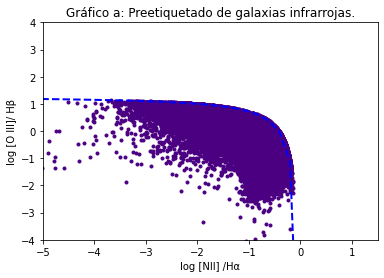

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(filtrados["Ejex_NH"], filtrados["Ejey_OHB"], marker=".", color="indigo")

# Cuadrado:
ax.set_xlim(-5, 1.5)
ax.set_ylim(-4, 4)
plt.title('Gráfico a: Preetiquetado de galaxias infrarrojas.')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')

# Kauffmann
x2 = np.linspace(-10,0)
y2 = 1.3 + (0.61/(x2-0.05))
plt.plot(x2, y2, '--', color='blue', lw=2, label='Kauffman')

## 1.2 Para NII.
## a. Infrarroja = Abajo de Kauffmann   
## aa. Etiquetado gráfico a

In [14]:
# Agregar una nueva columna "Infrarroja" al DataFrame con los valores "1" o "0"
df["Infrarroja"] = df.apply(lambda row: 1 if (row["Ejey_OHB"] <= (1.3 + (0.61 / (row["Ejex_NH"] - 0.05)))) and (row["Ejex_NH"] <= 0) else "0", axis=1)

In [15]:
df[10:15]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja
10,299500947439118336,146.56561,-1.084742,0.097556,169.8101,24.93788,135.89970,82.52895,248.92640,98.01175,76.62032,37.835190,b'GALAXY',b'BROADLINE',1.695529,0.668812,0.028001,-1.501441,0
11,299501497194932224,146.30548,-1.130551,0.154813,332.5545,73.13292,26.21341,31.17401,94.02802,51.57239,30.87200,25.812260,b'GALAXY',b'STARBURST',-1.026007,-0.976875,-1.394680,-2.555954,1
12,299503421340280832,146.51283,-0.845765,0.064902,1151.2110,257.94090,95.84792,186.80880,563.45860,194.40220,153.68080,32.057770,b'GALAXY',b'STARFORMING',-0.989968,-0.428140,-1.196129,-3.581030,1
13,299504520851908608,146.57273,-1.060836,0.060614,144.6518,30.73027,10.57220,18.58332,56.05157,31.04092,17.30779,6.340064,b'GALAXY',b'STARFORMING',-1.067020,-0.661721,-1.095890,-3.127441,1
14,299506444527495168,146.86432,-0.464072,0.065152,451.1271,104.85060,15.12925,50.27374,151.63720,64.19861,42.08566,6.879756,b'GALAXY',b'STARFORMING',-1.935907,-0.803922,-1.445632,-4.183166,1


In [16]:
conteo_infrarrojas = df["Infrarroja"].value_counts()[1]
conteo_infrarrojas

252625

In [17]:
conteo_0 = df["Infrarroja"].value_counts()["0"]
conteo_0

57721

In [18]:
suma=16228+3772
suma

20000

## 1.2 Para NII.
## b. Compuesta = Arriba de Kauffmann y abajo de Kewley (Intermedias)   

In [19]:
# Kewley
x1 = np.linspace(-10, 0.4)  
y1 = 1.19 + (0.61/(x1 - 0.47))

# Kauffmann
x2 = np.linspace(-10, 0)
y2 = 1.3 + (0.61/(x2 - 0.05))

In [20]:
# Filtrar los datos entre las curvas de Kauffmann y Kewley
interp_y1 = np.interp(df["Ejex_NH"], x1, y1) # Kew
interp_y2 = np.interp(df["Ejex_NH"], x2, y2) # Kauff

indices = np.where((df["Ejey_OHB"] < interp_y1) & (df["Ejey_OHB"] > interp_y2))
datos_entre_kauffmann_kewley = df.loc[indices]

Text(0.5, 0, 'log [NII] /Hα')

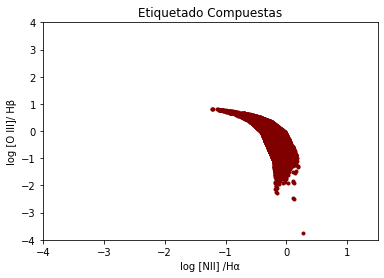

In [21]:
# Graficar los datos
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_kauffmann_kewley["Ejex_NH"], datos_entre_kauffmann_kewley["Ejey_OHB"], marker=".", color="maroon")

ax.set_xlim([-4, 1.5])
ax.set_ylim([-4, 4])

plt.title('Etiquetado Compuestas')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')

In [22]:
# La otra porcion: 

In [23]:
# Obtener los datos que están entre Kauffmann y Kewley
x1 = np.linspace(-4, 0.4)
y1 = 1.19 + (0.61 / (x1 - 0.47))

x2 = np.linspace(-4, 0)
y2 = 1.3 + (0.61 / (x2 - 0.05))

interp_y1 = np.interp(df["Ejex_NH"], x1, y1)
interp_y2 = np.interp(df["Ejex_NH"], x2, y2)

indices = np.where((df["Ejey_OHB"] < interp_y2) & (df["Ejey_OHB"] > interp_y1))

datos_entre_kauffmann_kewley = df.loc[indices]

Text(0.5, 0, 'log [NII] /Hα')

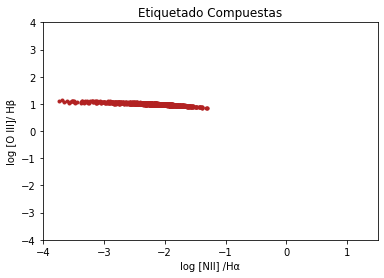

In [24]:
# Graficar los datos
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_kauffmann_kewley["Ejex_NH"], datos_entre_kauffmann_kewley["Ejey_OHB"], marker=".", color="firebrick")

ax.set_xlim([-4, 1.5])
ax.set_ylim([-4, 4])

plt.title('Etiquetado Compuestas')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')

In [25]:
# Ahora todo junto

In [26]:
# Kewley
x1 = np.linspace(-10, 0.4)  
y1 = 1.19 + (0.61/(x1-0.47))

# Kauffmann
x2 = np.linspace(-10,0)
y2 = 1.3 + (0.61/(x2 - 0.05))

In [27]:
# Filtrar los datos entre las curvas de Kauffmann y Kewley
interp_y1 = np.interp(df["Ejex_NH"], x1, y1)  # Kew
interp_y2 = np.interp(df["Ejex_NH"], x2, y2)  # Kauff

indices1 = np.where((df["Ejey_OHB"] < interp_y1) & (df["Ejey_OHB"] > interp_y2))
datos_entre_kauffmann_kewley1 = df.loc[indices1]

indices2 = np.where((df["Ejey_OHB"] < interp_y2) & (df["Ejey_OHB"] > interp_y1))
datos_entre_kauffmann_kewley2 = df.loc[indices2]

Text(0.5, 0, 'log [NII] /Hα')

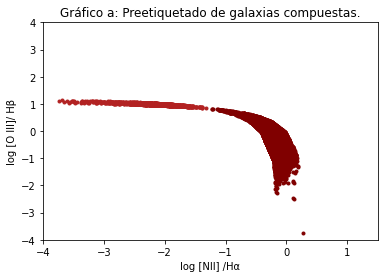

In [28]:
# Graficar los datos
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_kauffmann_kewley1["Ejex_NH"], datos_entre_kauffmann_kewley1["Ejey_OHB"], marker=".", color="maroon")
ax.scatter(datos_entre_kauffmann_kewley2["Ejex_NH"], datos_entre_kauffmann_kewley2["Ejey_OHB"], marker=".", color="firebrick")

ax.set_xlim([-4, 1.5])
ax.set_ylim([-4, 4])

# Agregar las líneas de Kauffmann y Kewley al mismo gráfico
# ax.plot(x1, y1, '-', color='red', lw=2, label='Kewley')
# ax.plot(x2, y2, '--', color='blue', lw=2, label='Kauffmann')

plt.title('Gráfico a: Preetiquetado de galaxias compuestas.')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')
# plt.legend()

In [29]:
len(datos_entre_kauffmann_kewley1)

20828

In [30]:
len(datos_entre_kauffmann_kewley2)

1396

In [31]:
suma= 21887+1530
suma

23417

## 1.2 Para NII.
## b. Compuesta = Arriba de Kauffmann y abajo de Kewley (Intermedias)   
## bb. Etiquetado gráfico b

In [32]:
# Crear la columna Etiqueta4 en df
df["Combinada"] = "0"

In [33]:
# Obtener los índices de los datos entre las curvas de Kauffmann y Kewley
indices1 = np.where((df["Ejey_OHB"] < interp_y1) & (df["Ejey_OHB"] > interp_y2))[0]
indices2 = np.where((df["Ejey_OHB"] < interp_y2) & (df["Ejey_OHB"] > interp_y1))[0]

In [34]:
# Asignar la etiqueta "Combinada" a los datos entre las curvas
df.loc[indices1, "Combinada"] = 1
df.loc[indices2, "Combinada"] = 1

In [35]:
df[0:5]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,sii_6731_flux,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.49560,68.39606,74.302520,224.11360,124.71150,84.18053,18.594930,b'GALAXY',b'STARFORMING',-0.557964,-0.459740,-0.816412,-3.235340,1,0
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.64047,21.44437,17.104640,51.59155,35.33497,21.65778,8.490424,b'GALAXY',b'STARFORMING',-0.178710,-0.369459,-0.556229,-2.460214,1,1
2,299491051364706304,146.96390,-0.545003,0.055988,181.52620,47.36650,11.85567,17.948720,54.13749,31.28298,19.16762,4.319232,b'GALAXY',b'STARBURST',-1.385109,-0.923537,-1.280405,-3.738322,1,0
3,299491051834468352,146.63167,-0.988278,0.052654,127.30580,38.33226,35.46671,8.550285,25.78963,30.26996,25.72297,6.269853,b'GALAXY',b'STARFORMING',-0.077697,-1.310284,-0.821367,-3.010839,1,0
4,299492700632147968,146.59272,-0.760256,0.065024,211.50180,53.18228,15.59901,25.314650,76.35482,41.63770,28.47964,7.211103,b'GALAXY',b'STARFORMING',-1.226518,-0.732506,-1.104063,-3.378612,1,0


In [36]:
count_combinada = df["Combinada"].value_counts()[1]
count_combinada

22224

## 1.2 Para NII.
## c. LINER = Arriba de Kewley y abajo de Seyfert-LINER

Gráfica general AGNs:

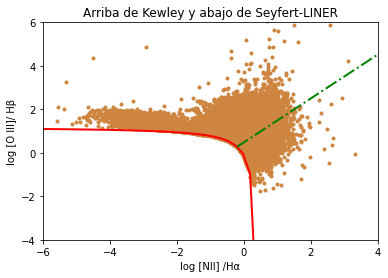

In [37]:
indices = np.where((df["Ejey_OHB"] > interp_y1) & (df["Ejey_OHB"] > interp_y2))
datos_entre_kauffmann_kewley = df.loc[indices]

# Graficar los datos
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_kauffmann_kewley["Ejex_NH"], datos_entre_kauffmann_kewley["Ejey_OHB"], marker=".", color="peru")

ax.set_xlim([-6, 4])
ax.set_ylim([-4, 6])

plt.title('Arriba de Kewley y abajo de Seyfert-LINER')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')

ax.plot(x1, y1, '-', color='red', lw=2, label='Kewley')

# Seyfert-LINER
x3 = np.linspace(-0.2, 5)
y3 = 1.01 * x3 + 0.48
ax.plot(x3, y3, '-.', color='green', lw=2, label='Seyfert-LINER')

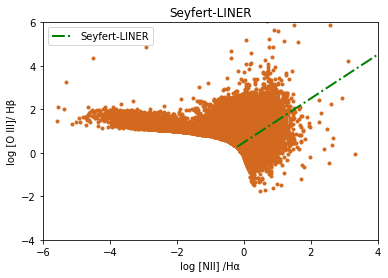

In [38]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_kauffmann_kewley["Ejex_NH"], datos_entre_kauffmann_kewley["Ejey_OHB"], marker=".", color="chocolate")

ax.set_xlim([-6, 4])
ax.set_ylim([-4, 6])


# Línea Seyfert-LINER
x3 = np.linspace(-0.2, 5)
y3 = 1.01 * x3 + 0.48
ax.plot(x3, y3, '-.', color='green', lw=2, label='Seyfert-LINER')

plt.title('Seyfert-LINER')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')
plt.legend()

### Abajo de Seyfert-LINER y arriba de Kewley = LINER

In [39]:
interp_y3 = np.interp(df["Ejex_NH"], x3, y3)

In [40]:
# Obtener los datos por debajo de la curva Seyfert-LINER pero por encima de la curva Kewley
indices = np.where((df["Ejey_OHB"] < interp_y3) & (df["Ejey_OHB"] > interp_y1))
datos_entre_seyfert_kewley = df.loc[indices]

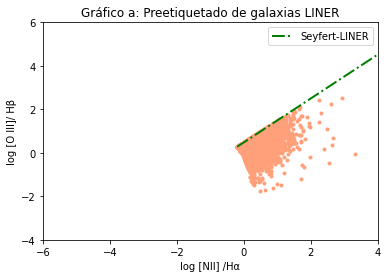

In [41]:
# Graficar los datos por debajo de la curva Seyfert-LINER pero por encima de la curva Kewley
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_seyfert_kewley["Ejex_NH"], datos_entre_seyfert_kewley["Ejey_OHB"], marker=".", color="lightsalmon")


ax.set_xlim([-6, 4])
ax.set_ylim([-4, 6])

ax.plot(x3, y3, '-.', color='green', lw=2, label='Seyfert-LINER')

plt.title('Gráfico a: Preetiquetado de galaxias LINER')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')
plt.legend()

## 1.2 Para NII.
## c. LINER = Arriba de Kewley y abajo de Seyfert-LINER
## cc. Etiquetado gráfico c

In [42]:
# Crear la columna Etiqueta3 en df y asignar "0" a todos los valores
df["LINER"] = "0"

In [43]:
# Obtener los índices de los datos encima de la línea Kewley y debajo de la línea Seyfert-LINER
indices3 = np.where((df["Ejey_OHB"] < interp_y3) & (df["Ejey_OHB"] > interp_y1))

In [44]:
# Asignar la etiqueta "LINER" a los datos que cumplen la condición
df.loc[indices3[0], "LINER"] = 1

In [45]:
df[10012:10017]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,oi_6300_flux,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER
10012,375084961604069376,185.63903,-2.025531,0.113787,236.63420,50.47549,35.885880,62.169280,187.516900,48.228320,...,17.834850,b'GALAXY',b'AGN',-0.341144,0.053689,-1.029303,-2.585361,0,0,1
10013,375085786237790208,185.58043,-2.051581,0.020578,652.12550,193.83600,338.761300,30.979140,93.440230,127.072300,...,22.316440,b'GALAXY',b'STARFORMING',0.558283,-1.656579,-1.179680,-3.374913,1,0,0
10014,375086885749417984,185.55596,-1.911560,0.071662,265.63420,63.94186,44.332970,42.022200,126.748600,45.455810,...,9.183011,b'GALAXY',b'STARFORMING',-0.366246,-0.453579,-1.250180,-3.364765,1,0,0
10015,375087435505231872,185.52538,-2.494154,0.120141,108.07980,15.88303,6.810206,12.831380,38.702420,20.423690,...,4.481755,b'GALAXY',b'STARFORMING',-0.846829,-0.740632,-1.128273,-3.182855,1,0,0
10016,375094307452905472,185.64360,-1.546461,0.021536,43.63894,16.14518,23.058880,2.751872,8.300282,9.276609,...,2.913616,b'GALAXY',b'STARFORMING',0.356429,-1.373325,-0.924161,-2.706555,1,0,0


In [46]:
contador_liner = df["LINER"].value_counts()[1]
contador_liner

14270

## 1.2 Para NII.
## d. Seyfert = Arriba de Kewley y arrriba de Seyfert-LINER.

In [47]:
# Arriba de Seyfert-LINER y Kewley

In [48]:
interp_y4 = np.interp(df["Ejex_NH"], x3, y3)

In [49]:
# Obtener los datos por debajo de la curva Seyfert-LINER pero por encima de la curva Kewley
indices = np.where((df["Ejey_OHB"] > interp_y4) & (df["Ejey_OHB"] > interp_y1))
datos_entre_seyfert_kewley = df.loc[indices]

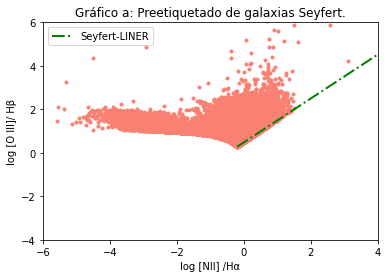

In [50]:
# Graficar los datos por encima de la curva Seyfert-LINER y encima de la curva Kewley
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(datos_entre_seyfert_kewley["Ejex_NH"], datos_entre_seyfert_kewley["Ejey_OHB"], marker=".", color="salmon")

ax.set_xlim([-6, 4])
ax.set_ylim([-4, 6])

ax.plot(x3, y3, '-.', color='green', lw=2, label='Seyfert-LINER')

plt.title('Gráfico a: Preetiquetado de galaxias Seyfert.')
plt.ylabel('log [O III]/ Hβ')
plt.xlabel('log [NII] /Hα')
plt.legend()

## 1.2 Para NII.
## d. Seyfert = Arriba de Kewley y arrriba de Seyfert-LINER.
## dd. Etiquetado gráfico d

In [51]:
# Crear la columna Etiqueta4 en df
df["Seyfert"] = "0"

In [52]:
# Obtener los índices de los datos que están encima de la curva Seyfert-LINER y encima de la curva Kewley
indices4 = np.where((df["Ejey_OHB"] > interp_y4) & (df["Ejey_OHB"] > interp_y1))

In [53]:
# Asignar la etiqueta "Seyfert" a los datos correspondientes en la columna Etiqueta4
df.loc[indices4[0], "Seyfert"] = 1

In [54]:
df[0:5]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,class,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER,Seyfert
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.49560,68.39606,74.302520,224.11360,124.71150,...,b'GALAXY',b'STARFORMING',-0.557964,-0.459740,-0.816412,-3.235340,1,0,0,0
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.64047,21.44437,17.104640,51.59155,35.33497,...,b'GALAXY',b'STARFORMING',-0.178710,-0.369459,-0.556229,-2.460214,1,1,0,0
2,299491051364706304,146.96390,-0.545003,0.055988,181.52620,47.36650,11.85567,17.948720,54.13749,31.28298,...,b'GALAXY',b'STARBURST',-1.385109,-0.923537,-1.280405,-3.738322,1,0,0,0
3,299491051834468352,146.63167,-0.988278,0.052654,127.30580,38.33226,35.46671,8.550285,25.78963,30.26996,...,b'GALAXY',b'STARFORMING',-0.077697,-1.310284,-0.821367,-3.010839,1,0,0,0
4,299492700632147968,146.59272,-0.760256,0.065024,211.50180,53.18228,15.59901,25.314650,76.35482,41.63770,...,b'GALAXY',b'STARFORMING',-1.226518,-0.732506,-1.104063,-3.378612,1,0,0,0


# 1.3 Etiquetas MANERA DEDUCTIVA.

1.3.1 Comprobación de cantidades.  
1.3.2 Solucion de cantidades.  
1.3.3 Matriz NII Deductiva.  
1.3.4 Graficas de NII Deductiva.  

### 1.3.1 Comprobación de cantidades: 

In [55]:
contador_Seyfert = df["Seyfert"].value_counts()[1]
contador_Seyfert

25847

In [56]:
type(df)

pandas.core.frame.DataFrame

In [57]:
conteo_infrarrojas = df["Infrarroja"].value_counts()[1]
conteo_infrarrojas

252625

In [58]:
count_combinada = df["Combinada"].value_counts()[1]
count_combinada

22224

In [59]:
contador_LINER = df["LINER"].value_counts()[1]
contador_LINER

14270

In [60]:
contador_Seyfert = df["Seyfert"].value_counts()[1]
contador_Seyfert

25847

In [61]:
Suma= 268908+23417+14796+27528
Suma

334649

In [62]:
# Son solo 329.650 hay 4.999 repetidas

## Hay una parte que se debe anexar, espacio que queda entre arriba de Kauffman, abajo de Kewley, asi que se llamaran "Combinado"

### 1.3.2 Solucion de cantidades.

In [63]:
# Crear la columna "Sumas" que muestra la suma de los valores en las columnas "Infrarroja", "Combinada", "LINER" y "Seyfert"
df["Sumas"] = df[["Infrarroja", "Combinada", "LINER", "Seyfert"]].astype(int).sum(axis=1)

In [64]:
df

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER,Seyfert,Sumas
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.495600,68.396060,74.302520,224.113600,124.71150,...,b'STARFORMING',-0.557964,-0.459740,-0.816412,-3.235340,1,0,0,0,1
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.640470,21.444370,17.104640,51.591550,35.33497,...,b'STARFORMING',-0.178710,-0.369459,-0.556229,-2.460214,1,1,0,0,2
2,299491051364706304,146.96390,-0.545003,0.055988,181.52620,47.366500,11.855670,17.948720,54.137490,31.28298,...,b'STARBURST',-1.385109,-0.923537,-1.280405,-3.738322,1,0,0,0,1
3,299491051834468352,146.63167,-0.988278,0.052654,127.30580,38.332260,35.466710,8.550285,25.789630,30.26996,...,b'STARFORMING',-0.077697,-1.310284,-0.821367,-3.010839,1,0,0,0,1
4,299492700632147968,146.59272,-0.760256,0.065024,211.50180,53.182280,15.599010,25.314650,76.354820,41.63770,...,b'STARFORMING',-1.226518,-0.732506,-1.104063,-3.378612,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310341,3348592976002574336,261.10350,31.590881,0.025038,39.77857,9.911286,13.092160,2.224710,6.710238,12.47293,...,b'STARFORMING',0.278339,-1.493358,-0.689710,-2.569365,1,0,0,0,1
310342,3348593250880481280,261.13056,31.473702,0.103969,59.28167,21.498730,29.876350,16.099590,48.560090,13.66697,...,b'STARFORMING',0.329073,0.086838,-0.939454,-2.338641,0,0,1,0,1
310343,3348596274537457664,261.24627,31.260667,0.046037,397.82610,111.930900,67.077750,32.801550,98.937040,81.22416,...,b'STARBURST',-0.512029,-1.105195,-1.078493,-3.514075,1,0,0,0,1
310344,3348598748438620160,260.92678,31.854907,0.210566,1131.19200,326.400700,577.654500,123.076700,371.227700,33.13488,...,b'BROADLINE',0.570850,-0.827876,-2.898508,-3.921308,1,0,0,0,1


In [65]:
suma_total = df["Sumas"].sum()
print("La suma total de la columna 'Sumas' es:", suma_total)

La suma total de la columna 'Sumas' es: 314966


In [66]:
# filas donde el valor sea = o superior a 2
filas_superior_2 = df[df["Sumas"] >= 2]

In [67]:
filas_superior_2

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,subclass,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER,Seyfert,Sumas
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.640470,21.444370,17.104640,51.59155,35.334970,...,b'STARFORMING',-0.178710,-0.369459,-0.556229,-2.460214,1,1,0,0,2
103,299599628137949184,145.89128,1.116524,0.051580,3334.86300,953.794400,2399.147000,146.455800,441.74460,437.355600,...,b'STARBURST',0.922420,-1.735119,-1.495513,-3.761929,1,1,0,1,3
136,299627115928643584,146.58882,0.172600,0.057323,268.20910,67.070590,39.181660,49.027270,147.87760,59.298250,...,b'STARFORMING',-0.537537,-0.309046,-0.956265,-2.959593,1,1,0,0,2
268,300707111325689856,147.30638,1.177761,0.025023,132.14540,35.754170,24.186400,23.542550,71.00978,33.325010,...,b'STARFORMING',-0.390876,-0.334749,-0.813633,-2.704082,1,1,0,0,2
287,300727452290803712,147.72594,1.192665,0.028337,403.53220,133.776400,352.655700,11.002880,33.18724,65.234860,...,b'STARFORMING',0.969322,-2.211755,-1.320015,-3.241421,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309783,3344059964388829184,245.91614,18.933752,0.036520,193.73260,63.602810,175.141100,5.532828,16.68829,31.153630,...,b'STARFORMING',1.012934,-2.165436,-1.255149,-2.891368,1,1,0,1,3
310042,3346321934634739712,257.60509,36.805484,0.071378,495.56340,163.093100,427.001600,13.881580,41.87006,74.627560,...,b'STARBURST',0.962467,-2.184788,-1.376649,-3.126752,1,1,0,1,3
310060,3346337877553342464,258.35634,35.525279,0.056110,1230.87300,376.200000,955.639100,52.633700,158.75540,154.906300,...,b'STARBURST',0.932259,-1.761778,-1.516880,-3.778407,1,1,0,1,3
310139,3347407427573147648,258.13935,34.066741,0.085044,30.92933,8.266856,6.287621,5.416677,16.33795,3.519217,...,b'STARFORMING',-0.273671,-0.351878,-1.326638,-2.013121,1,1,0,0,2


In [68]:
len(filas_superior_2)

3224

In [69]:
# Obtener la lista de columnas que se deben evaluar
columnas_evaluar = ["Infrarroja", "Combinada", "LINER", "Seyfert"]

In [70]:
# Crear la columna "PreEtiqueta" con los valores correspondientes, si no es 1, entonces: es combinada.
def obtener_pre_etiqueta(row):
    etiquetas = []
    for etiqueta in columnas_evaluar:
        if row[etiqueta] == 1:
            etiquetas.append(etiqueta)
    if len(etiquetas) == 1:
        return etiquetas[0]
    else:
        return "Combinada"

In [71]:
df["PreEtiquetaNII"] = df.apply(obtener_pre_etiqueta, axis=1)

### 1.3.3 Matriz NII Deductiva.

In [72]:
df[0:10]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER,Seyfert,Sumas,PreEtiquetaNII
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.49560,68.39606,74.302520,224.11360,124.71150,...,-0.557964,-0.459740,-0.816412,-3.235340,1,0,0,0,1,Infrarroja
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.64047,21.44437,17.104640,51.59155,35.33497,...,-0.178710,-0.369459,-0.556229,-2.460214,1,1,0,0,2,Combinada
2,299491051364706304,146.96390,-0.545003,0.055988,181.52620,47.36650,11.85567,17.948720,54.13749,31.28298,...,-1.385109,-0.923537,-1.280405,-3.738322,1,0,0,0,1,Infrarroja
3,299491051834468352,146.63167,-0.988278,0.052654,127.30580,38.33226,35.46671,8.550285,25.78963,30.26996,...,-0.077697,-1.310284,-0.821367,-3.010839,1,0,0,0,1,Infrarroja
4,299492700632147968,146.59272,-0.760256,0.065024,211.50180,53.18228,15.59901,25.314650,76.35482,41.63770,...,-1.226518,-0.732506,-1.104063,-3.378612,1,0,0,0,1,Infrarroja
5,299493250857723904,146.94999,-0.592202,0.064779,229.13250,60.80691,29.73346,24.491550,73.87218,45.46917,...,-0.715430,-0.845628,-1.060717,-3.454973,1,0,0,0,1,Infrarroja
6,299496274514700288,146.95607,-0.342300,0.134680,77.04804,22.93367,20.20715,19.518040,58.87090,36.77939,...,-0.126570,0.017254,-0.041851,-1.819342,0,0,1,0,1,LINER
7,299496824270514176,147.17639,-0.354057,0.006283,129.30380,47.89519,62.74385,4.237359,12.78085,23.64687,...,0.270045,-2.027881,-1.185132,-4.847947,1,0,0,0,1,Infrarroja
8,299498473068193792,147.32951,0.028903,0.048096,493.31230,108.99000,56.12985,104.337700,314.70670,86.07532,...,-0.663588,-0.163166,-1.176673,-3.149075,0,1,0,0,1,Combinada
9,299500672561211392,146.57134,-0.957211,0.065183,351.30450,66.98206,18.08399,49.037670,147.90900,48.68991,...,-1.309398,-0.578720,-1.411553,-3.877328,1,0,0,0,1,Infrarroja


In [73]:
conteo_infrarroja = df["PreEtiquetaNII"].value_counts()["Infrarroja"]
conteo_infrarroja

249401

In [74]:
conteo_combinada = df["PreEtiquetaNII"].value_counts()["Combinada"]
conteo_combinada

22237

In [75]:
conteo_Liner = df["PreEtiquetaNII"].value_counts()["LINER"]
conteo_Liner

14270

In [76]:
conteo_seyfert = df["PreEtiquetaNII"].value_counts()["Seyfert"]
conteo_seyfert

24438

In [81]:
sumat= conteo_infrarroja+ conteo_combinada + conteo_Liner + conteo_seyfert
sumat

310346

## Ahora si estan correctamente etiquetadas las 310.346!

### 1.3.4 Graficas de NII Deductiva.

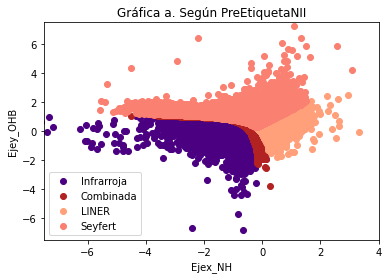

In [82]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Configurar los colores según la columna "PreEtiqueta"
colores = {
    "Infrarroja": "indigo",
    "Combinada": "firebrick",
    "LINER": "lightsalmon",
    "Seyfert": "salmon"
}

# Filtrar los datos por etiqueta
datos_infrarroja = df[df["PreEtiquetaNII"] == "Infrarroja"]
datos_combinada = df[df["PreEtiquetaNII"] == "Combinada"]
datos_liner = df[df["PreEtiquetaNII"] == "LINER"]
datos_seyfert = df[df["PreEtiquetaNII"] == "Seyfert"]

# Graficar los puntos con colores según la etiqueta
ax.scatter(datos_infrarroja["Ejex_NH"], datos_infrarroja["Ejey_OHB"], color="indigo", label="Infrarroja")
ax.scatter(datos_combinada["Ejex_NH"], datos_combinada["Ejey_OHB"], color="firebrick", label="Combinada")
ax.scatter(datos_liner["Ejex_NH"], datos_liner["Ejey_OHB"], color="lightsalmon", label="LINER")
ax.scatter(datos_seyfert["Ejex_NH"], datos_seyfert["Ejey_OHB"], color="salmon", label="Seyfert")

# Configurar los límites de los ejes
ax.set_xlim([-7.5, 4])
ax.set_ylim([-7.5, 7.5])

# Agregar etiquetas y título
plt.xlabel("Ejex_NH")
plt.ylabel("Ejey_OHB")
plt.title("Gráfica a. Según PreEtiquetaNII")
plt.legend()

In [79]:
df1=df

In [80]:
df1[0:3]

,specobjid,ra,dec,z,h_alpha_flux,h_beta_flux,oiii_5007_flux,nii_6548_flux,nii_6584_flux,sii_6717_flux,...,Ejey_OHB,Ejex_NH,Ejex_SH,Ejex_OH,Infrarroja,Combinada,LINER,Seyfert,Sumas,PreEtiquetaNII
0,299489677444933632,146.71421,-1.041304,0.021222,472.59040,119.49560,68.39606,74.30252,224.11360,124.71150,...,-0.557964,-0.459740,-0.816412,-3.235340,1,0,0,0,1,Infrarroja
1,299490502078654464,146.62857,-0.765137,0.064656,99.40005,25.64047,21.44437,17.10464,51.59155,35.33497,...,-0.178710,-0.369459,-0.556229,-2.460214,1,1,0,0,2,Combinada
2,299491051364706304,146.96390,-0.545003,0.055988,181.52620,47.36650,11.85567,17.94872,54.13749,31.28298,...,-1.385109,-0.923537,-1.280405,-3.738322,1,0,0,0,1,Infrarroja


## Conclusiones:  
    Se logra identificacion en 4 Grupos principales para NII: Infrarroja, Combinada, LINER y Seyfert.